In [1]:
from zipfile import ZipFile
import os

zip_file_path = 'C:\\Users\\Admin\\Downloads\\women-fashion.zip'
extraction_directory = 'C:\\Users\\Admin\\Downloads\\women-fashion'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [2]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

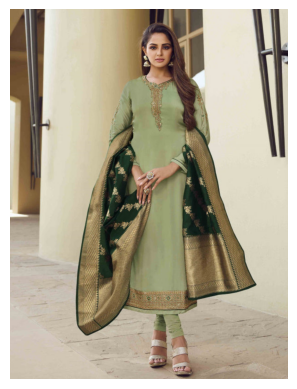

In [3]:
import os
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(file_path):
    try:
        image = Image.open(file_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except UnidentifiedImageError:
        print(f"Cannot identify image file: {file_path}")

# Define a list of valid image extensions
valid_image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"}

# Filter only valid image files
image_files = [
    file for file in extracted_files_updated 
    if os.path.splitext(file)[1].lower() in valid_image_extensions
]

# Ensure the list is not empty before displaying
if image_files:
    first_image_path = os.path.join(extraction_directory_updated, image_files[0])
    display_image(first_image_path)
else:
    print("No valid image files found.")


In [4]:
import glob

# directory path containing your images
image_directory = 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\Anarkali suit with a modern twist.jpg', 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'C:\\Users\\Admin\\Downloads\\women-fa

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━

In [7]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step


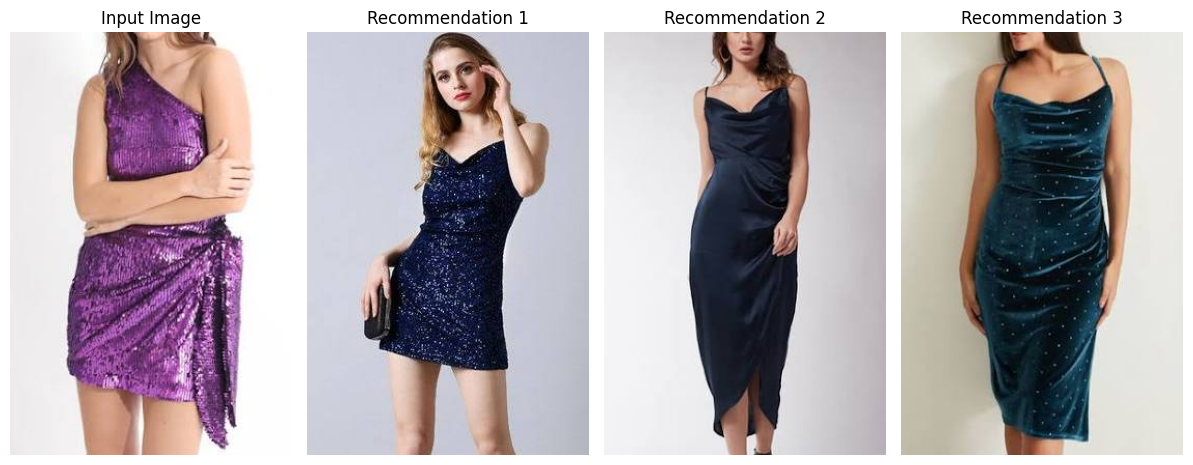

In [8]:
input_image_path = 'C:\\Users\\Admin\\Downloads\\women-fashion\\women fashion\\shiny purple sequined dress with a one-shoulder design.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)